In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
data = pd.read_excel("./Phishing_Dataset.xlsx")

In [3]:
missing_values_count = data.isnull().sum()
total_missing = missing_values_count.sum()
print(total_missing)

0


In [4]:
X = data[['NumDots',
'SubdomainLevel',
'PathLevel',
'UrlLength',
'NumDash',
'NumDashInHostname',
'AtSymbol',
'TildeSymbol',
'NumUnderscore',
'NumPercent',
'NumQueryComponents',
'NumAmpersand',
'NumHash',
'NumNumericChars',
'NoHttps',
'RandomString',
'IpAddress',
'DomainInSubdomains',
'DomainInPaths',
'HttpsInHostname',
'HostnameLength',
'PathLength',
'QueryLength',
'DoubleSlashInPath',
'NumSensitiveWords',
'EmbeddedBrandName',
'PctExtHyperlinks',
'PctExtResourceUrls',
'ExtFavicon',
'InsecureForms',
'RelativeFormAction',
'ExtFormAction',
'AbnormalFormAction',
'PctNullSelfRedirectHyperlinks',
'FrequentDomainNameMismatch',
'FakeLinkInStatusBar',
'RightClickDisabled',
'PopUpWindow',
'SubmitInfoToEmail',
'IframeOrFrame',
'MissingTitle',
'ImagesOnlyInForm',
'SubdomainLevelRT',
'UrlLengthRT',
'PctExtResourceUrlsRT',
'AbnormalExtFormActionR',
'ExtMetaScriptLinkRT',
'PctExtNullSelfRedirectHyperlinksRT'
]]
y = data['CLASS_LABEL']

In [5]:
cv = LeaveOneOut()

In [6]:
clf = SVC(kernel='linear')

In [7]:
y_pred = cross_val_predict(clf, X, y, cv=cv)

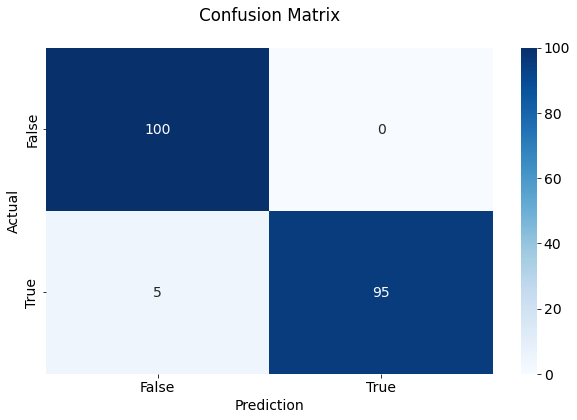

Accuracy: 0.975
Presicion: 1.000
Recall: 0.950


In [8]:
cf_matrix = confusion_matrix(y, y_pred)

ax = sb.heatmap(cf_matrix, annot=True, fmt="d", cmap='Blues')

ax.set_title('Confusion Matrix\n')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

print('Accuracy: %.3f' % accuracy_score(y, y_pred))
print('Presicion: %.3f' % precision_score(y, y_pred))
print('Recall: %.3f' % recall_score(y, y_pred))

In [9]:
clf_fit = clf.fit(X, y)

In [10]:
filename = "Phish_SVM_CV_Model.sav"
pickle.dump(clf_fit, open(filename, 'wb'))